   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

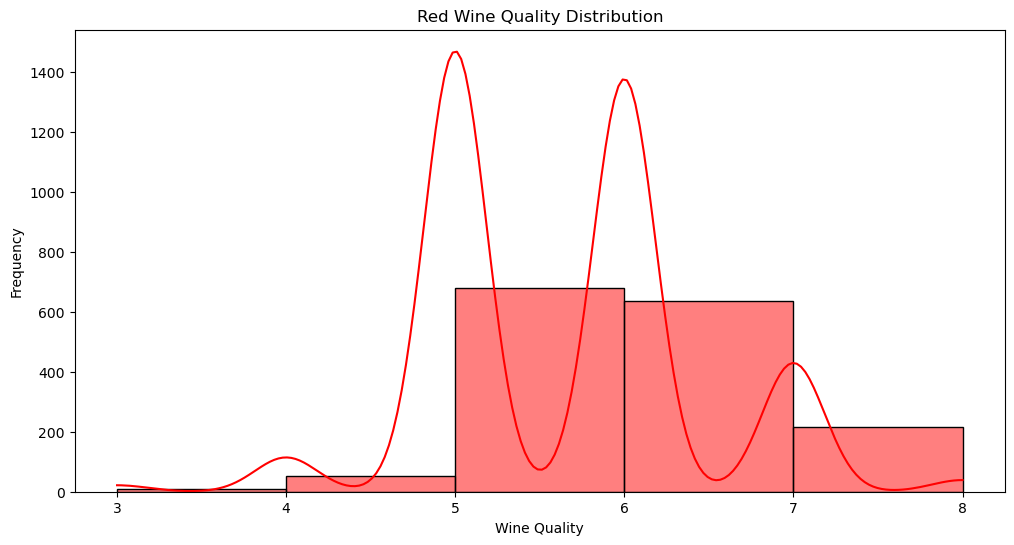

Accuracy: 0.659375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.75      0.73       130
           6       0.63      0.69      0.66       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320

Accuracy: 0.66
Precision: 0.63
Recall: 0.66
F1-score: 0.64
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.75      0.73       130
           6       0.63      0.69      0.66       132
           7       0.63      0.52      0.57        42
           8       0.00      0.

C:\Users\Sumit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sumit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sumit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sumit\anaconda3\lib\site-packages\sklearn\metr

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


# 1.Load the Dataset
dataset = pd.read_csv("C:/Users/Sumit/AI ML SmartBridge/Assignment-4/winequality-red.csv")
print(dataset.head())

# 2.Data preprocessing including visualization
plt.figure(figsize=(12, 6))
sns.histplot(dataset['quality'], color='red', bins=5, kde=True)
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Red Wine Quality Distribution')
plt.show()

# 3.Machine Learning Model building
X = dataset.drop('quality', axis=1)
y = dataset['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# 4.Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 5.Test with random observation
new_observation = pd.DataFrame({
    'fixed acidity': [7.0],
    'volatile acidity': [0.3],
    'citric acid': [0.2],
    'residual sugar': [2.0],
    'chlorides': [0.08],
    'free sulfur dioxide': [15],
    'total sulfur dioxide': [50],
    'density': [0.995],
    'pH': [3.3],
    'sulphates': [0.6],
    'alcohol': [10.5]
})
predicted_quality = rf_classifier.predict(new_observation)
print(f"Predicted Wine Quality: {predicted_quality[0]}")
